In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# cell types search

In [262]:
df = pd.read_csv('Downloads/CSF_needed_markers_in_clusters.csv')
df = df.set_index('Unnamed: 0')

In [301]:
path_to_state_files = 'D:/Phystech/MS_state/additional_files/'

In [286]:
cell_names = {
    'CD3E': 'ab T cell', 'TRAC': 'ab T cell', 'LCK': 'ab T cell', 
    'IL7R': 'CD4+ T cell', 'CD4': 'CD4+ T cell',
    'CD8B': 'a CD8+ T cell', 'CD8A': 'a CD8+ T cell', 'CCL5': 'a CD8+ T cell', 
    'CD8na': 'na CD8+ T cell','CCR7': 'na CD8+ T cell', 
    'FOXP3': 'Treg cell', 'CTLA4': 'Treg cell', 
    'TRDC': 'gd T cell', 
    'GNLY': 'NK cell', 'NKG7': 'NK cell', 
    'FCGR3A': 'NK1 cell', 'CD16': 'NK1 cell', 'PRF1': 'NK1 cell',
    'SELL': 'NK2 cell', 'CD62L': 'NK2 cell', 'XCL1': 'NK2 cell', 
    'CD79A': 'B cell', 
    'IGHD': 'naive B cell', 'CD37': 'naive B cell',
    'CD27': 'a B cell', 'IGHM': 'a B cell',
    'IGHG': 'Plasmablast', 'CD38': 'Plasmablast', 'TNFRSF17': 'Plasmablast', 'CD269': 'Plasmablast',
    'LYZ': 'mDC', 
    'WDFY4': 'mDC1', 'XCR1': 'mDC1', 'BATF3': 'mDC1', 
    'FCER1A': 'mDC2', 'CD1C': 'mDC2', 'CLEC10A': 'mDC2',
    'S100A8': 'granulocyte', 'S100A9': 'granulocyte',
    'FCGR3A': 'monocyte1', 'CD16': 'monocyte1', 'CD14': 'monocyte1',
    'TCF4': 'pDC', 'E2-2': 'pDC', 'TNFRSF21': 'pDC', 'DR6': 'pDC',
    'GNG11': 'megakaryocytes',
    'CLU': 'megakaryocytes',
    'GATA3': 'Th2 cell',
    'CCR3': 'Th2 cell',
    'CCR4': 'Th2 cell',
    'CXCR3': 'a T cells, NK, Th1',
    'CD68': 'macro/mono',
    'Cd7': 'T cell',
    'GZMB': 'cytotoxic T/ NK cell',
}

In [317]:
markers_df = dict(zip(cell_names.values(), ['' for i in cell_names.values()]))
for marker in cell_names.keys():
    markers_df[cell_names[marker]] += f', {marker}'
markers_df = pd.DataFrame(dict([ (k,pd.Series(v[2:])) for k,v in markers_df.items() ]))
markers_df.T.rename({0: 'markers'},  axis = 1).to_csv( path_to_state_files + 'cell_markers.csv')

In [319]:
markers_df.T.rename({0: 'markers'},  axis = 1)

,markers
ab T cell,"CD3E, TRAC, LCK"
CD4+ T cell,"IL7R, CD4"
a CD8+ T cell,"CD8B, CD8A, CCL5"
na CD8+ T cell,"CD8na, CCR7"
Treg cell,"FOXP3, CTLA4"
gd T cell,TRDC
NK cell,"GNLY, NKG7"
monocyte1,"FCGR3A, CD16, CD14"
NK1 cell,PRF1
NK2 cell,"SELL, CD62L, XCL1"


In [265]:
cell_types = pd.DataFrame(cell_names).T.rename({0: 'celltype'}, axis = 1)

In [266]:
df = pd.concat([df, cell_types], axis = 1)

In [ ]:
cluster = '0'
df[df[cluster]>0].sort_values(cluster, ascending = False)[[cluster, 'celltype']]

# Onco res aggregation to visualization

In [ ]:
csf_biopath = pd.read_csv('Downloads/csf_top10_all_cells_bipathways_min1genes.csv').drop(['Unnamed: 0'], axis = 1)
# pbmc_biopath = pd.read_csv('Downloads/PBMC_top10_all_cells_bipathways_min1genes.csv').drop(['Unnamed: 0'], axis = 1)

In [ ]:
PBMC = False

if not PBMC:
    all_pos_paths = np.unique(csf_biopath.loc[:, csf_biopath.columns.str.contains('pos')].values)
    all_neg_paths = np.unique(csf_biopath.loc[:, csf_biopath.columns.str.contains('neg')].values)

elif PBMC:
    all_pos_paths = np.unique(pbmc_biopath.loc[:, pbmc_biopath.columns.str.contains('pos')].values)
    all_neg_paths = np.unique(pbmc_biopath.loc[:, pbmc_biopath.columns.str.contains('neg')].values)

In [ ]:
print('Number unique paths', 'pos:',  len(all_pos_paths), 'neg:',  len(all_neg_paths))

In [ ]:
metabolism_base = pd.read_csv('D:/Phystech/НИР_ауттоимм/databases/Metabolism/arr.csv')
qiagen_base = pd.read_csv('D:/Phystech/НИР_ауттоимм/databases/Qiagen 1.123/arr.csv')

In [ ]:
np.unique([i.split('_')[0] for i in all_pos_paths])

In [ ]:
np.unique([i.split('_')[0] for i in all_neg_paths])

In [ ]:
KEGG_pos = [i for i in all_pos_paths if 'KEGG' in i]
NCI_pos = [i for i in all_pos_paths if 'NCI' in i]
biocarta_pos = [i for i in all_pos_paths if 'biocarta' in i]
reactome_pos = [i for i in all_pos_paths if 'reactome' in i]
meta_pos = [i for i in all_pos_paths if i in metabolism_base.columns]
qiagen_pos = [i for i in all_pos_paths if i in qiagen_base.columns]

In [ ]:
# [' '.join(i.split('_')) for i in NCI_pos]
[i for i in NCI_pos]

In [ ]:
KEGG_neg = [i for i in all_neg_paths if 'KEGG' in i]
NCI_neg = [i for i in all_neg_paths if 'NCI' in i]
biocarta_neg = [i for i in all_neg_paths if 'biocarta' in i]
reactome_neg = [i for i in all_neg_paths if 'reactome' in i]
meta_neg = [i for i in all_neg_paths if i in metabolism_base.columns]
qiagen_neg = [i for i in all_neg_paths if i in qiagen_base.columns]

In [ ]:
[' '.join(i.split('_')) for i in qiagen_neg]

# Figures making

In [ ]:
PBMC_pos = pd.read_csv('D:/Phystech/НИР_ауттоимм/reanalysis25112022/biopath_results/PBMC_pos_unique_from_all_types.csv', sep = ';')
PBMC_neg = pd.read_csv('D:/Phystech/НИР_ауттоимм/reanalysis25112022/biopath_results/PBMC_neg_unique_from_all_types.csv', sep = ';')

CSF_pos = pd.read_csv('D:/Phystech/НИР_ауттоимм/reanalysis25112022/biopath_results/CSF_pos_unique_from_all_types.csv', sep = ';')
CSF_neg = pd.read_csv('D:/Phystech/НИР_ауттоимм/reanalysis25112022/biopath_results/CSF_neg_unique_from_all_types.csv', sep = ';')

In [ ]:
neg_cats = []
for cat in CSF_neg.columns:
    neg_cats += [cat]*CSF_neg[cat].dropna().shape[0]
pos_cats = []
for cat in CSF_pos.columns:
    pos_cats += [cat]*CSF_pos[cat].dropna().shape[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

In [ ]:
# set colors to all unique cats

all_cats = np.unique(np.array(
    CSF_neg.columns.to_list() + CSF_pos.columns.to_list() + \
    PBMC_pos.columns.to_list() + PBMC_neg.columns.to_list()
))

all_colors = ['#FF9999','#FFCC99','#FFFF99','#CCFF99',  '#99FF99',
              '#99FFCC','#99FFFF','#99CCFF','#9999FF','#CC99FF',
              '#FF99FF','#483D8B', '#6B8E23','#778899']
d_colors= dict(zip(all_cats, all_colors))

In [ ]:
len(all_cats)

In [ ]:
# df = pd.DataFrame(CSF_neg.nunique()).rename({0:'cats'}, axis = 1)
# y = df.cats.to_numpy()
# mylabels = df.index.to_numpy()
# mycolors = [d_colors[label] for label in mylabels]


fig, ax = plt.subplots(2,2, figsize =(9, 6))

plt.subplots_adjust(left=0,
                    bottom=0.1,
                    right=1,
                    top=0.85,
                    wspace=-0.5,
                    hspace=0.1)

df = pd.DataFrame(CSF_pos.nunique()).rename({0:'cats'}, axis = 1)
y = df.cats.to_numpy()
mylabels = df.index.to_numpy()
mycolors = [d_colors[label] for label in mylabels]
ax[0, 0].pie(y, colors = mycolors,
       wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'}) # ,autopct='%1.2f%%', labels = mylabels
ax[0, 0].set_title('CSF, MS pathways')

df = pd.DataFrame(CSF_neg.nunique()).rename({0:'cats'}, axis = 1)
y = df.cats.to_numpy()
mylabels = df.index.to_numpy()
mycolors = [d_colors[label] for label in mylabels]
ax[0, 1].pie(y, colors = mycolors,
       wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'}) # ,autopct='%1.2f%%', labels = mylabels
ax[0, 1].set_title('CSF, CONT pathways')

df = pd.DataFrame(PBMC_pos.nunique()).rename({0:'cats'}, axis = 1)
y = df.cats.to_numpy()
mylabels = df.index.to_numpy()
mycolors = [d_colors[label] for label in mylabels]
ax[1, 0].pie(y, colors = mycolors,
       wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'}) # ,autopct='%1.2f%%', labels = mylabels
ax[1, 0].set_title('PBMC, MS pathways')

df = pd.DataFrame(PBMC_neg.nunique()).rename({0:'cats'}, axis = 1)
y = df.cats.to_numpy()
mylabels = df.index.to_numpy()
mycolors = [d_colors[label] for label in mylabels]
ax[1, 1].pie(y, colors = mycolors,
       wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'}) # ,autopct='%1.2f%%' , labels = mylabels
ax[1, 1].set_title('PBMC, CONT pathways')


legend_elements = []
for cat in all_cats:
    legend_elements.append(Patch(facecolor=d_colors[cat], edgecolor='black',
                         label=cat))
    
fig.legend(handles=legend_elements, bbox_to_anchor=(1,0.5, 0, 0), loc="center", fontsize=14, 
           bbox_transform=plt.gcf().transFigure)

# fig.suptitle('Biopathway', fontsize=14)
plt.savefig("D:/Phystech/MS_state/Biopath_categories_summary_pie.pdf", bbox_inches="tight")
plt.show()

# individualy pathways search

In [ ]:
csf_biopath = pd.read_csv('Downloads/csf_top10_all_cells_bipathways_min1genes.csv').drop(['Unnamed: 0'], axis = 1)
pbmc_biopath = pd.read_csv('Downloads/PBMC_top10_all_cells_bipathways_min1genes.csv').drop(['Unnamed: 0'], axis = 1)

In [ ]:
path = 'reactome Classical antibody mediated complement activation Main Pathway'
path = '_'.join(path.split(' '))
csf_biopath[(csf_biopath == path).any(1)]

In [ ]:
pbmc_biopath[(pbmc_biopath == path).any(1)]

In [ ]:
for col in pbmc_biopath.columns:
    if pbmc_biopath[pbmc_biopath[col] == path].shape[0] >0:
        print(col)

In [ ]:
for col in csf_biopath.columns:
    if csf_biopath[csf_biopath[col] == path].shape[0] >0:
        print(col)

# Cell counts plot

In [ ]:
df = pd.read_csv('Downloads/PBMC_cell_counts.csv').rename({'Idents.PBMC.integrated.': 'celltypes', 'PBMC.integrated.stim': 'stim'}, axis = 1)

In [ ]:
df[df['stim'] == 'MS'] # CONT = 15004, MS = 25076

# Cmap results plots

In [186]:
import seaborn as sns

In [189]:
PBMC_merged = pd.read_csv('Downloads/PBMC_cmap_res_all.csv').drop(['Unnamed: 0'], axis = 1)
CSF_merged = pd.read_csv('Downloads/CSF_cmap_res_all.csv').drop(['Unnamed: 0'], axis = 1)

# CSF_merged = CSF_merged.drop(['CD4+Tcell'], axis = 1)

In [190]:
np.unique(PBMC_merged.values).shape

(155,)

In [221]:
np.unique(CSF_merged.values).shape

(50,)

In [241]:
# молекулы во всех клетках
all_values = [set(i) for i in PBMC_merged.values.T]
set.intersection(
    all_values[0], all_values[1], all_values[2], all_values[3], all_values[4],
    all_values[5], all_values[6], all_values[7], all_values[8], all_values[9],
    all_values[10], all_values[11])

{'-666'}

In [237]:
# молекулы во всех клетках
all_values = [set(i) for i in CSF_merged.values.T]
set.intersection(
    all_values[0], all_values[1], all_values[2], all_values[3], all_values[4],
    all_values[5], all_values[6], all_values[7], all_values[8], all_values[9],
    all_values[10],all_values[11],all_values[12],all_values[13])

{'-666',
 'GDC-0941',
 'GDC-0980',
 'KU-0063794',
 'NVP-BEZ235',
 'NVP-BGT226',
 'OSI-027',
 'PIK-93',
 'WYE-125132',
 'torin-1',
 'torin-2'}

In [243]:
mol = 'GR 103691' mDC2, mDC1 NK cells, plasmablasts 
for col in CSF_merged.columns:
    if mol in CSF_merged[col]:
        print(col)

In [ ]:
# Luminespib, geldanamycin, Brefeldin, (Cyclosporine ARP 101) SNS-032 GR 103691 Tyrphostin AG 1478 CA-074-Me calyculin A

In [ ]:
# Dactolisib, torin-1, WYE-125132, Apitolisib, OSI-027, Pictilisib, 
# PI-103, torin-2, PIK-93, KU-0063794, NVP-BGT226, ZSTK-474, AZD-8055, wortmannin, GSK-1059615

In [219]:
# СSF молекулы встречающиеся больше пяти раз или топ 20 наиболее встречающихся 
CSF_rename_mols = {
    'NVP-BEZ235': 'Dactolisib', #  PI3K inhibitor
    'torin-1':'torin-1', # mTOR Inhibitor
    'WYE-125132':'WYE-125132', # mTOR inhibitor and PI3K inhibitor
    '-666':'Luminespib',  # HSP90 inhibitor https://maayanlab.cloud/dmoa/sig/CPC006_HA1E_24H:BRD-K41859756-001-01-9:10
    'GDC-0980':'Apitolisib', #  PI3K inhibitor and mTOR inhibitor 
    'OSI-027':'OSI-027', #  dual inhibitor of mTORC1 and mTORC2
    'geldanamycin':'geldanamycin', #  antibiotic that inhibits the function of Hsp90
    'GDC-0941':'Pictilisib', #  PI3K inhibitor and mTOR inhibitor 
    'PI-103':'PI-103', #  PI3K inhibitor and mTOR inhibitor 
    'torin-2':'torin-2',  # mTOR Inhibitor
    'PIK-93':'PIK-93', # PI4K (PI4KIIIβ) inhibitor, PI3K inhibitor
    'KU-0063794':'KU-0063794', # dual-mTOR inhibitor of mTORC1 and mTORC2
    'NVP-BGT226':'NVP-BGT226', # PI3K/mTOR inhibitor
    '89671':'Brefeldin', # antibiotic
    'CYCLOSPORINE': 'Cyclosporine', #  immunosuppressant againt T cells
    'BMS-387032':'SNS-032', # inhibitor of CDK2, CDK7, and CDK9
    'GR 103691':'GR 103691',# dopamine D3 receptor antagonist
    'Tyrphostin AG 1478':'Tyrphostin AG 1478', #  EGFR inhibitor
    'ZSTK-474':'ZSTK-474', #  PI3K inhibitor
    'AZD-8055':'AZD-8055', # mTOR inhibitor
    'ARP 101':'ARP 101', #  T cell supressor
    'CA-074-Me':'CA-074-Me', # Cathepsin B Inhibitor IV
    'calyculin A':'calyculin A' # protein phosphatase inhibitor  
}


PBMC_rename_mols = {
    '-666':'Luminespib', # HSP90 inhibitor https://maayanlab.cloud/dmoa/sig/CPC006_HA1E_24H:BRD-K41859756-001-01-9:10
    'NVP-BEZ235': 'Dactolisib', #  PI3K inhibitor
    'torin-1':'torin-1', # mTOR Inhibitor
    'GDC-0980':'Apitolisib', #  PI3K inhibitor and mTOR inhibitor
    'WYE-125132':'WYE-125132', # mTOR inhibitor and PI3K inhibitor
    'geldanamycin':'geldanamycin', #  antibiotic that inhibits the function of Hsp90
    'AZD-8055':'AZD-8055', # mTOR inhibitor
    'CGP-60474':'CGP-60474', # cyclin-dependent kinase (CDK) inhibitor
    'WZ-3105':'WZ-3105', # anticancer
    'GDC-0941':'Pictilisib', #  PI3K inhibitor and mTOR inhibitor 
    'KU-0063794':'KU-0063794', # dual-mTOR inhibitor of mTORC1 and mTORC2
    'BMS-387032':'SNS-032', # inhibitor of CD=-K2, CDK7, and CDK9
    'NVP-AUY922':'Luminespib', # HSP90 inhibitor
    'NVP-BGT226':'NVP-BGT226', # PI3K/mTOR inhibitor
    'ZSTK-474':'ZSTK-474', #  PI3K inhibitor
    'torin-2':'torin-2',  # mTOR Inhibitor
    'PI-103':'PI-103', #  PI3K inhibitor and mTOR inhibitor 
    'CYCLOSPORINE': 'Cyclosporine', #  immunosuppressant againt T cells
    'wortmannin':'wortmannin', # PI3K inhibitor
    'BX-795':'BX-795', # PDK1 inhibitor, a potent inhibitor of cell growth of multiple cancer cell lines
    'mitoxantrone':'mitoxantrone', # MS drug, anticancer
    'FGIN-1-27':'FGIN-1-27', # anxiolytic agent
    'PIK-93':'PIK-93', # PI4K (PI4KIIIβ) inhibitor, PI3K inhibitor
    'AG14361':'AG14361', #  inhibitor of PARP1
    'OSI-027':'OSI-027', #  dual inhibitor of mTORC1 and mTORC2
    'GSK-1059615':'GSK-1059615', # PI3K inhibitor
    'LDN-193189':'LDN-193189', # BMP Pathway Inhibitor
    'A443654':'A443654' #  inhibitor of Akt serine/threonine kinases
}

In [213]:
# save table with all unique 
# pd.DataFrame({'all_mols':np.unique(np.concatenate([np.unique(PBMC_merged.values), np.unique(CSF_merged.values)]))}).to_csv('Downloads/All_mols_for_rename_and_desc.csv')
pd.DataFrame({'all_mols':np.unique(np.concatenate([np.unique(PBMC_merged.values), np.unique(CSF_merged.values)]))}).shape

(170, 1)

In [214]:
CSF_mols = pd.DataFrame({'CSF_all':CSF_merged.values.flatten()})

CSF_mols = CSF_mols.replace({"CSF_all": CSF_rename_mols})

PBMC_mols = pd.DataFrame({'PBMC_all':PBMC_merged.values.flatten()})

PBMC_mols = PBMC_mols.replace({"PBMC_all": PBMC_rename_mols})

In [256]:
d = pd.DataFrame(PBMC_mols.PBMC_all.value_counts())
d[d.PBMC_all < 5].head(20)

,PBMC_all
buparlisib,4
KIN001-055,4
VU0418939-2,4
SID 26681509,3
QL-XII-47,3
Mycophenolic acid,3
89671,3
ARP 101,3
dasatinib,3
SU11652,3


Text(0.5, 1.0, 'PBMC')

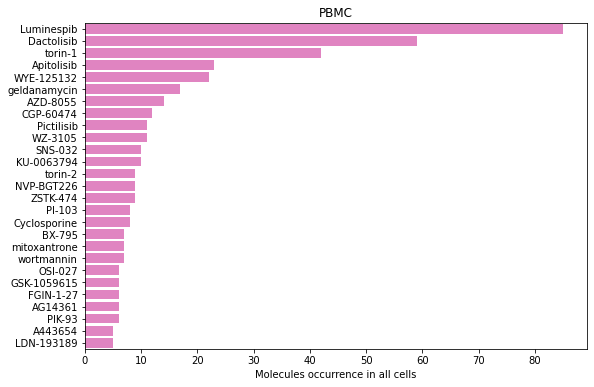

In [320]:
df = pd.DataFrame(PBMC_mols.PBMC_all.value_counts()).rename({'PBMC_all': 'Molecules occurrence in all cells'}, axis = 1)
# df = df.reset_index().iloc[:20, :].rename({'index': ''}, axis = 1)
df = df.reset_index().rename({'index': ''}, axis = 1)
df = df[df['Molecules occurrence in all cells'] >= 5]

fig = plt.figure(figsize = (9,6))
sns.barplot(
    data=df, x="Molecules occurrence in all cells", y="", facecolor=(204/255, 51/255, 153/255, 0.6) # '#CC3399'
)
plt.title('PBMC')
# plt.axis('off')

Text(0.5, 1.0, 'CSF')

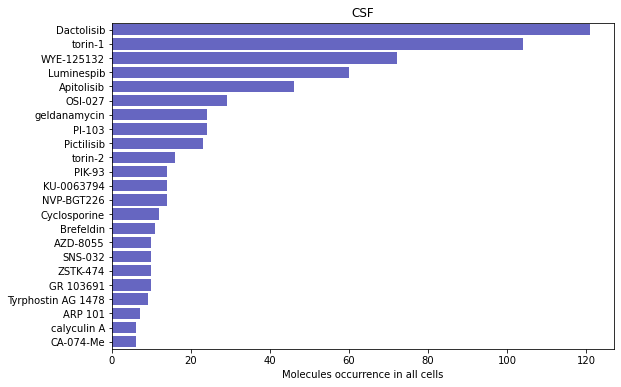

In [216]:
df = pd.DataFrame(CSF_mols.CSF_all.value_counts()).rename({'CSF_all': 'Molecules occurrence in all cells'}, axis = 1)
# df = df.reset_index().iloc[:20, :].rename({'index': ''}, axis = 1)
df = df.reset_index().rename({'index': ''}, axis = 1)
df = df[df['Molecules occurrence in all cells'] >= 5]

fig = plt.figure(figsize = (9,6))
sns.barplot(
    data=df, x="Molecules occurrence in all cells", y="", facecolor=(0, 0, 153/255, 0.6) # '#000099'
)

plt.title('CSF')
# plt.axis('off')

In [197]:
common_cells = [celltype for celltype in CSF_merged.columns if celltype in PBMC_merged.columns]
print(len(common_cells))

11


### Intersections between all cell types

In [198]:
from matplotlib_venn import venn2,venn2_circles
from matplotlib import pyplot as plt
%matplotlib inline

In [199]:
colors_map = {'na CD8+ T cell' : '#CC6633',
    'ab T cell' : '#990000',
    'gd T cell' : '#996666',
    'a CD8+ T cell' : '#FF6633',
    'NK cell' : '#CC3399',
    'granulocyte' : '#99FF33',
    'megakaryocyte' : '#006600',
    'naive B cell' : '#CC9900',
    'monocyte' : '#000099',
    'mDC' : '#0099FF',
    'mDC2' : '#66FFFF',
    'GrB+ pDC' : '#FF99FF',
    'Plasmablast' : '#006600',
    'T cell': '#330000'
    
}
common_cells_color_map = {}
for key in colors_map.keys():
    common_cells_color_map[''.join(key.split(' '))] = colors_map[key]

### For major cell types

In [201]:
CSF_merged_major = {}

CSF_merged_major['All_T_cells'] = np.unique(CSF_merged[['abTcell', 'gdTcell', 'aCD8+Tcell', 'naCD8+Tcell', 'Tcell']])
CSF_merged_major['All_mDCs'] = np.unique(CSF_merged[['mDC', 'mDC2']])

for celltype in ['monocyte', 'NKcell', 'naiveBcell', 'granulocyte', 'GrB+pDC']:
    CSF_merged_major[celltype] = np.unique(CSF_merged[celltype].values)

PBMC_merged_major = {}

PBMC_merged_major['All_T_cells'] = np.unique(PBMC_merged[['abTcell', 'gdTcell', 'aCD8+Tcell', 'naCD8+Tcell']])
PBMC_merged_major['All_mDCs'] = np.unique(PBMC_merged[['mDC', 'mDC2']])

for celltype in ['monocyte', 'NKcell', 'naiveBcell', 'granulocyte', 'GrB+pDC']:
    PBMC_merged_major[celltype] = np.unique(PBMC_merged[celltype].values)
    
common_cells_color_map['All_T_cells'] = '#330000'
common_cells_color_map['All_mDCs'] = '#0099FF'

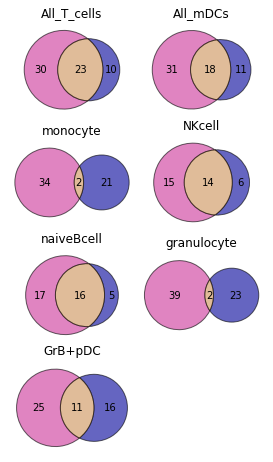

In [202]:
major_common = ['All_T_cells', 'All_mDCs', 'monocyte', 'NKcell', 'naiveBcell', 'granulocyte', 'GrB+pDC' ]

fig = plt.figure(figsize =(9, 6))

plt.subplots_adjust(left=0,
                    bottom=0,
                    right=0.4,
                    top=1,
                    wspace=0,
                    hspace=0.2)

sublots = [421, 422, 423, 424, 425, 426, 427]
for ind, celltype in enumerate(major_common):
    inter_mols = set([i for i in CSF_merged_major[celltype] if i in PBMC_merged_major[celltype]])
    subsets = (
       PBMC_merged_major[celltype].shape[0] - len(inter_mols),
       CSF_merged_major[celltype].shape[0] - len(inter_mols),
       len(inter_mols)
    )
    labels = ('PBMC', 'CSF')
    
    plt.subplot(sublots[ind]).set_title(celltype)
    
    c = venn2(subsets = subsets,
#           set_labels = labels)
          set_labels = ['', ''])
    c.get_patch_by_id('10').set_color('#CC3399')
    c.get_patch_by_id('01').set_color('#000099')
    c.get_patch_by_id('10').set_edgecolor('black')
    c.get_patch_by_id('01').set_edgecolor('black')
    c.get_patch_by_id('10').set_alpha(0.6)
    c.get_patch_by_id('01').set_alpha(0.6)
#     c.get_patch_by_id('11').set_color(common_cells_color_map[celltype])
    c.get_patch_by_id('11').set_edgecolor('black')
#     c.get_patch_by_id('11').set_alpha(0.9)
    c.get_patch_by_id('11').set_alpha(0.4)
    

#     ax[0, 0].set_title(celltype)
#     plt.title(celltype)
plt.show()

### For every equal cell type

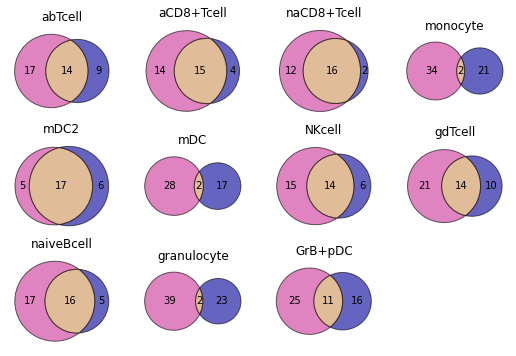

In [203]:
fig = plt.figure(figsize =(9, 6))

# plt.subplots_adjust(left=0,
#                     bottom=0,
#                     right=0.4,
#                     top=1,
#                     wspace=0,
#                     hspace=0.2)

sublots = [(0, 0), (0, 1), (0, 2), (0, 3), 
           (1, 0), (1, 1), (1, 2), (1, 3),  
           (2, 0), (2, 1), (2, 2), (2, 3)]

for ind, celltype in enumerate(common_cells):
    inter_mols = set([i for i in CSF_merged[celltype].values if i in PBMC_merged[celltype].values])
    subsets = (
       PBMC_merged[celltype].unique().shape[0] - len(inter_mols),
       CSF_merged[celltype].unique().shape[0] - len(inter_mols),
       len(inter_mols)
    )
    
#     labels = ('PBMC', 'CSF')
    labels = ['', '']
    
    plt.subplot2grid((3,4), sublots[ind]).set_title(celltype)
    
    c = venn2(subsets = subsets,
          set_labels = labels)

    c.get_patch_by_id('10').set_color('#CC3399')
    c.get_patch_by_id('01').set_color('#000099')
    c.get_patch_by_id('10').set_edgecolor('black')
    c.get_patch_by_id('01').set_edgecolor('black')
    c.get_patch_by_id('10').set_alpha(0.6)
    c.get_patch_by_id('01').set_alpha(0.6)
#     c.get_patch_by_id('11').set_color(common_cells_color_map[celltype])
    c.get_patch_by_id('11').set_edgecolor('black')
#     c.get_patch_by_id('11').set_alpha(0.9)
    c.get_patch_by_id('11').set_alpha(0.4)
    
#     c.get_patch_by_id('10').set_color(common_cells_color_map[celltype])
#     c.get_patch_by_id('01').set_color(common_cells_color_map[celltype])
#     c.get_patch_by_id('10').set_edgecolor('black')
#     c.get_patch_by_id('01').set_edgecolor('black')
#     c.get_patch_by_id('10').set_alpha(0.7)
#     c.get_patch_by_id('01').set_alpha(0.3)
#     c.get_patch_by_id('11').set_color(common_cells_color_map[celltype])
#     c.get_patch_by_id('11').set_edgecolor('black')
#     c.get_patch_by_id('11').set_alpha(0.9)

plt.show()

# supervenn for all cell types

In [204]:
# https://github.com/gecko984/supervenn
from supervenn import supervenn

Text(0.5, 1.0, 'CSF')

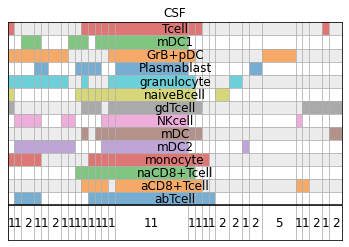

In [205]:
plt.figure(figsize=(6, 4))

labels = list(CSF_merged.columns)
sets = []
for celltype in labels:
    sets.append(set(CSF_merged[celltype].unique()))

supervenn(sets, labels, side_plots=False)
plt.xlabel('')
plt.ylabel('')
plt.title('CSF')

Text(0.5, 1.0, 'PBMC')

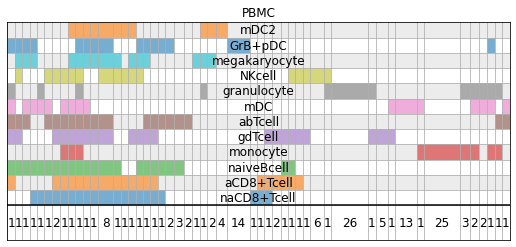

In [206]:
plt.figure(figsize=(9, 4))

labels = list(PBMC_merged.columns)
sets = []
for celltype in labels:
    sets.append(set(PBMC_merged[celltype].unique()))

supervenn(sets, labels, side_plots=False, widths_minmax_ratio=0.2)
plt.xlabel('')
plt.ylabel('')
plt.title('PBMC')